<a href="https://colab.research.google.com/github/zahraa-m/PHE_UK/blob/main/PHE_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zahraa's Code** ⬇
## In the code below, I prepared the data to:




### 1.   Produce a cross table to calculate the total quantity of each medicine per area in Greater Manchester.
### 2.   Produce a cross table to calculate the cost of each medicine per area in Greater Manchester.
### 3.   Calculate the difference in the total quantity of each medicine between 2020 and 2021.
### 4.   Calculate the increased percentage of the total quantity for each medicine.
### 5.   Calculate the difference in cost of each medicine between 2020 and 2021.
### 6.   Calculate the increased percentage of the cost for each medicine.

In [1]:
import pandas as pd
df_2020= pd.read_csv('https://raw.githubusercontent.com/zahraa-m/PHE_UK/main/EPD_202004.csv')
df_2021= pd.read_csv('https://raw.githubusercontent.com/zahraa-m/PHE_UK/main/EPD_202104.csv')

df_2020['area_co'] = df_2020['POSTCODE'].str[0:3]
df_2021['area_co'] = df_2021['POSTCODE'].str[0:3]

#calculate total quantity per medicine in each area in the Greater Manchester
TQ_per_med_2020 = pd.crosstab(index=df_2020['CHEMICAL_SUBSTANCE_BNF_DESCR'], columns=df_2020['area_co'], values=df_2020['TOTAL_QUANTITY'], aggfunc='sum', margins=True).fillna(0).astype(int)
TQ_per_med_2021 = pd.crosstab(index=df_2021['CHEMICAL_SUBSTANCE_BNF_DESCR'], columns=df_2021['area_co'], values=df_2021['TOTAL_QUANTITY'], aggfunc='sum', margins=True).fillna(0).astype(int)

TQ_per_med_2020.to_csv("TQ_2020.csv")
TQ_per_med_2021.to_csv("TQ_2021.csv")


#calculate Cost per medicine in each area in the Greater Manchester
cost_per_med_2020 = pd.crosstab(index=df_2020['CHEMICAL_SUBSTANCE_BNF_DESCR'], columns=df_2020['area_co'], values=df_2020['ACTUAL_COST'], aggfunc='sum', margins=True).fillna(0).astype(int)
cost_per_med_2021 = pd.crosstab(index=df_2021['CHEMICAL_SUBSTANCE_BNF_DESCR'], columns=df_2021['area_co'], values=df_2021['ACTUAL_COST'], aggfunc='sum', margins=True).fillna(0).astype(int)

#Delete the "All" row in the table
TQ_per_med_2020 = TQ_per_med_2020.drop(["All"], axis=0)
TQ_per_med_2021 = TQ_per_med_2021.drop(["All"], axis=0)

cost_per_med_2020 = cost_per_med_2020.drop(["All"], axis=0)
cost_per_med_2021 = cost_per_med_2021.drop(["All"], axis=0)

#Rename the All column to TQ_2020 and TQ_2021
TQ_per_med_2020 = TQ_per_med_2020.rename(columns={"All": "TQ_2020"})
TQ_per_med_2021 = TQ_per_med_2021.rename(columns={"All": "TQ_2021"})

cost_per_med_2020 = cost_per_med_2020.rename(columns={"All": "cost_2020"})
cost_per_med_2021 = cost_per_med_2021.rename(columns={"All": "cost_2021"})

#filter the tables to include only medicine's name and total quantity
df1 = TQ_per_med_2020.filter(['CHEMICAL_SUBSTANCE_BNF_DESCR', 'TQ_2020'])
df2 = TQ_per_med_2021.filter(['CHEMICAL_SUBSTANCE_BNF_DESCR', 'TQ_2021'])

#filter the tables to include only medicine's name and Cost
df3 = cost_per_med_2020.filter(['CHEMICAL_SUBSTANCE_BNF_DESCR', 'cost_2020'])
df4 = cost_per_med_2021.filter(['CHEMICAL_SUBSTANCE_BNF_DESCR', 'cost_2021'])

#find the difference between Total quantity of 2020 and 2021
TQ_per_drug_allyear = pd.merge(df1, df2, how="outer", on=('CHEMICAL_SUBSTANCE_BNF_DESCR')).fillna(0).astype(int)
diff_TQ = (df2['TQ_2021'] - df1['TQ_2020'] )
TQ_per_drug_allyear['diff_TQ']=diff_TQ.fillna(0) 

#find the percentage of the difference
diff_TQ_pct = (diff_TQ / df1['TQ_2020']) * 100
TQ_per_drug_allyear['diff_TQ_pct']=diff_TQ_pct.fillna(0)

#Filter zero differance in total quantity
TQ_per_drug_allyear= TQ_per_drug_allyear.query("diff_TQ>0")


#find the difference between cost of medicine in 2020 and 2021
cost_per_drug_allyear = pd.merge(df3, df4, how="outer", on=('CHEMICAL_SUBSTANCE_BNF_DESCR')).fillna(0).astype(int)
diff_cost = (df4['cost_2021'] - df3['cost_2020'])
cost_per_drug_allyear['diff_cost']= diff_cost.fillna(0)

#find the percentage of the difference
diff_cost_pct = (diff_cost / df3['cost_2020']) * 100
cost_per_drug_allyear['diff_cost_pct']= diff_cost_pct.fillna(0)

#Filter zero differance in cost
cost_per_drug_allyear=cost_per_drug_allyear.query("diff_cost>0")






### 7. Below I plotted the data that I have prepared above. You would need to install **Plotly** package to see the plots. Plotly is used to create interactive plots and maps. Please use this code to install the package:


In [2]:
!pip install -U plotly

     |████████████████████████████████| 26.5 MB 116.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1



### 8. After installing Plotly, we can run the next code to illustrate the PHE data.


In [3]:

#plot the difference between Total quantity of medicine in 2021 and 2020
import plotly.express as px
fig_TQ = px.line(TQ_per_drug_allyear, x=TQ_per_drug_allyear.index, y='diff_TQ',
                  labels={
                     "x": "Medicines",
                     "diff_TQ": "Total Quantity difference"},
                 title='Total Quantity difference between 2021 & 2020')
fig_TQ.show()

#plot the percentage of difference between Total quantity of medicine in 2021 and 2020
fig_TQ_pct = px.line(TQ_per_drug_allyear, x=TQ_per_drug_allyear.index, y='diff_TQ_pct',
                  labels={
                     "x": "Medicines",
                     "diff_TQ_pct": "Total Quantity Increase %"},
                 title='Percentage increase of Total Quantity difference between 2021 & 2020')
fig_TQ_pct.update_traces(line_color='#F54730')
fig_TQ_pct.show()


#plot the cost difference between the medicine of 2021 and 2020
fig_cost = px.line(cost_per_drug_allyear, x=cost_per_drug_allyear.index, y='diff_cost',
                    labels={
                       "x": "Medicines",
                       "diff_cost": "Cost difference"},
                   title='Cost difference between 2021 & 2020')
fig_cost.show()

#plot the percentage of cost difference between the medicine of 2021 and 2020
fig_cost_pct = px.line(cost_per_drug_allyear, x=cost_per_drug_allyear.index, y='diff_cost_pct',
                  labels={
                     "x": "Medicines",
                     "diff_cost_pct": "Cost Increase %"},
                 title='Percentage increase of Cost difference between 2021 & 2020')
fig_cost_pct.update_traces(line_color='#F54730')
fig_cost_pct.show()





### 9. Show the table of total quantity of medicine in 2021 sorted by the increase precentage



In [4]:
import plotly.graph_objects as go


TQ_per_drug_allyear= TQ_per_drug_allyear.sort_values('diff_TQ_pct', ascending=False)
TQ_per_drug_allyear = TQ_per_drug_allyear.reset_index(drop=False, inplace=False)
fig_tab = go.Figure(data=[go.Table(
    header=dict(values=['Medicine Name', 'Total Quantity 2020', 'Total Quantity 2021', 'Diff between 2020 & 2021', 'Increase Percentage PCT'],
                align='left'),
    cells=dict(values=[TQ_per_drug_allyear.CHEMICAL_SUBSTANCE_BNF_DESCR, TQ_per_drug_allyear.TQ_2020, TQ_per_drug_allyear.TQ_2021, TQ_per_drug_allyear.diff_TQ, TQ_per_drug_allyear.diff_TQ_pct],
               align='left'))
])

fig_tab.show()


### 10. Plot Manchester map to show the distribution of the medicine "Influenza" in 2021.


In [5]:
import plotly.express as px1
from urllib.request import urlopen
import json

with urlopen('https://raw.githubusercontent.com/zahraa-m/PHE_UK/main/manchester.geojson') as response:
  manches = json.load(response)


map1 = TQ_per_med_2021.loc[TQ_per_med_2021.index == 'Influenza'].T
map1 = map1.reset_index(drop=False, inplace=False)
map1.drop(map1.tail(1).index,inplace=True) 

fig_map1 = px1.choropleth(map1, geojson=manches, color="Influenza",
                        locations="area_co", featureidkey="properties.area_co", 
                        scope="europe", projection="mercator",
                        color_continuous_scale="Blues", range_color=(0, 300))
fig_map1.update_geos(fitbounds="locations", visible=False)
fig_map1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_map1.update_geos(fitbounds="locations", visible=False)
fig_map1.show()

# **Juliana's Code** ⬇
# In the code below I have:


### - Changed Zahraa's code to check the difference in total quantity and cost of each category of medicines.
### - Checked the total mean quantity and mean cost per type of medicine per postcode in Greater Manchester.
### - Produced cross tables to calculate the total quantity and actual cost of each category of medicine per postcode in Greater Manchester.
### - Plotted the total quantity and actual cost of the category "Immunological products and vaccines" per postcode in Greater Manchester in 2020 and 2021.
### - Plotted the total quantity and actual cost of the category "Nutrition and blood" per postcode in Greater Manchester in 2020 and 2021.

In [ ]:
#calculate total quantity per type of medicine in each area in the Greater Manchester
TQ_per_med_2020 = pd.crosstab(index=df_2020['BNF_CHAPTER_PLUS_CODE'], columns=df_2020['area_co'], values=df_2020['TOTAL_QUANTITY'], aggfunc='sum', margins=True).fillna(0).astype(int)
TQ_per_med_2021 = pd.crosstab(index=df_2021['BNF_CHAPTER_PLUS_CODE'], columns=df_2021['area_co'], values=df_2021['TOTAL_QUANTITY'], aggfunc='sum', margins=True).fillna(0).astype(int)

TQ_per_med_2020.to_csv("TQ_2020.csv")
TQ_per_med_2021.to_csv("TQ_2021.csv")


#calculate Cost per type of medicine in each area in the Greater Manchester
cost_per_med_2020 = pd.crosstab(index=df_2020['BNF_CHAPTER_PLUS_CODE'], columns=df_2020['area_co'], values=df_2020['ACTUAL_COST'], aggfunc='sum', margins=True).fillna(0).astype(int)
cost_per_med_2021 = pd.crosstab(index=df_2021['BNF_CHAPTER_PLUS_CODE'], columns=df_2021['area_co'], values=df_2021['ACTUAL_COST'], aggfunc='sum', margins=True).fillna(0).astype(int)

#Delete the "All" row in the table
TQ_per_med_2020 = TQ_per_med_2020.drop(["All"], axis=0)
TQ_per_med_2021 = TQ_per_med_2021.drop(["All"], axis=0)

cost_per_med_2020 = cost_per_med_2020.drop(["All"], axis=0)
cost_per_med_2021 = cost_per_med_2021.drop(["All"], axis=0)

#Rename the All column to TQ_2020 and TQ_2021
TQ_per_med_2020 = TQ_per_med_2020.rename(columns={"All": "TQ_2020"})
TQ_per_med_2021 = TQ_per_med_2021.rename(columns={"All": "TQ_2021"})

cost_per_med_2020 = cost_per_med_2020.rename(columns={"All": "cost_2020"})
cost_per_med_2021 = cost_per_med_2021.rename(columns={"All": "cost_2021"})

#filter the tables to include only medicine's type and total quantity
df1 = TQ_per_med_2020.filter(['BNF_CHAPTER_PLUS_CODE', 'TQ_2020'])
df2 = TQ_per_med_2021.filter(['BNF_CHAPTER_PLUS_CODE', 'TQ_2021'])

#filter the tables to include only medicine's type and Cost
df3 = cost_per_med_2020.filter(['BNF_CHAPTER_PLUS_CODE', 'cost_2020'])
df4 = cost_per_med_2021.filter(['BNF_CHAPTER_PLUS_CODE', 'cost_2021'])

#find the difference between Total quantity of 2020 and 2021
TQ_per_drug_allyear = pd.merge(df1, df2, how="outer", on=('BNF_CHAPTER_PLUS_CODE')).fillna(0).astype(int)
diff_TQ = (df2['TQ_2021'] - df1['TQ_2020'] )
TQ_per_drug_allyear['diff_TQ']=diff_TQ.fillna(0) 

#find the percentage of the difference
diff_TQ_pct = (diff_TQ / df1['TQ_2020']) * 100
TQ_per_drug_allyear['diff_TQ_pct']=diff_TQ_pct.fillna(0)

#Filter zero differance in total quantity
TQ_per_drug_allyear= TQ_per_drug_allyear.query("diff_TQ>0")


#find the difference between cost of medicine in 2020 and 2021
cost_per_drug_allyear = pd.merge(df3, df4, how="outer", on=('BNF_CHAPTER_PLUS_CODE')).fillna(0).astype(int)
diff_cost = (df4['cost_2021'] - df3['cost_2020'])
cost_per_drug_allyear['diff_cost']= diff_cost.fillna(0)

#find the percentage of the difference
diff_cost_pct = (diff_cost / df3['cost_2020']) * 100
cost_per_drug_allyear['diff_cost_pct']= diff_cost_pct.fillna(0)

#Filter zero differance in cost
cost_per_drug_allyear=cost_per_drug_allyear.query("diff_cost>0")

In [ ]:
#plot the difference between Total quantity of medicine in 2021 and 2020
import plotly.express as px
fig_TQ = px.line(TQ_per_drug_allyear, x=TQ_per_drug_allyear.index, y='diff_TQ',
                  labels={
                     "x": "Type of medicines",
                     "diff_TQ": "Total Quantity difference"},
                 title='Total Quantity difference between 2021 & 2020')
fig_TQ.show()

#plot the percentage of difference between Total quantity of medicine in 2021 and 2020
fig_TQ_pct = px.line(TQ_per_drug_allyear, x=TQ_per_drug_allyear.index, y='diff_TQ_pct',
                  labels={
                     "x": "Type of Medicines",
                     "diff_TQ_pct": "Total Quantity Increase %"},
                 title='Percentage increase of Total Quantity difference between 2021 & 2020')
fig_TQ_pct.update_traces(line_color='#F54730')
fig_TQ_pct.show()


#plot the cost difference between the medicine of 2021 and 2020
fig_cost = px.line(cost_per_drug_allyear, x=cost_per_drug_allyear.index, y='diff_cost',
                    labels={
                       "x": "Type of Medicines",
                       "diff_cost": "Cost difference"},
                   title='Cost difference between 2021 & 2020')
fig_cost.show()

#plot the percentage of cost difference between the medicine of 2021 and 2020
fig_cost_pct = px.line(cost_per_drug_allyear, x=cost_per_drug_allyear.index, y='diff_cost_pct',
                  labels={
                     "x": "Type of Medicines",
                     "diff_cost_pct": "Cost Increase %"},
                 title='Percentage increase of Cost difference between 2021 & 2020')
fig_cost_pct.update_traces(line_color='#F54730')
fig_cost_pct.show()

In [ ]:
#filter per area_co, bnf_chapter_plus_code, total_quantity, actual_cost
a_2020 = df_2020.loc[:,["area_co", "BNF_CHAPTER_PLUS_CODE", "TOTAL_QUANTITY", "ACTUAL_COST"]]
a_2021 = df_2021.loc[:,["area_co", "BNF_CHAPTER_PLUS_CODE", "TOTAL_QUANTITY", "ACTUAL_COST"]]

# Checking the mean quantity of medicines for each postcode
quantity_per_area_2020 = a_2020.groupby('area_co')['TOTAL_QUANTITY'].mean()
quantity_per_area_2021 = a_2021.groupby('area_co')['TOTAL_QUANTITY'].mean()

print(quantity_per_area_2020)
print(quantity_per_area_2021)

# Checking the Actual cost of medicines in total for each postcode
cost_per_area_2020 = a_2020.groupby('area_co')['ACTUAL_COST'].mean()
cost_per_area_2021 = a_2021.groupby('area_co')['ACTUAL_COST'].mean()

print(cost_per_area_2020)
print(cost_per_area_2021)

area_co
M1     228.990623
M11    487.078564
M12    550.989604
M13    448.453683
M14    443.773614
M15    525.078895
M16    509.255814
M18    456.092398
M19    431.901856
M20    448.554846
M21    430.946356
M22    457.870084
M23    396.568281
M30     30.000000
M33    141.815385
M34    100.446309
M4     574.770671
M40    493.030605
M8     624.347965
M9     479.897317
WA1     19.666667
Name: TOTAL_QUANTITY, dtype: float64
area_co
L35    134.666667
M1     224.933626
M11    503.713635
M12    507.736632
M13    478.437820
M14    464.473711
M15    474.028008
M16    505.263650
M18    469.283441
M19    479.602201
M20    441.280840
M21    415.702214
M22    482.926700
M23    381.788925
M33    158.475439
M34     78.515789
M4     481.524483
M40    490.573416
M8     585.182157
M9     475.048142
WA2     64.714286
WN2     97.150000
WN3     34.500000
WN7     34.291209
Name: TOTAL_QUANTITY, dtype: float64
area_co
M1     28.967217
M11    35.248864
M12    37.637076
M13    32.106003
M14    34.336860
M15    

In [ ]:
#Generating a crosstable with the total quantity of each category of medicine per postcode in 2020
TQ3_per_med_2020 = pd.crosstab(index=a_2020['area_co'], columns=a_2020['BNF_CHAPTER_PLUS_CODE'], values=a_2020['TOTAL_QUANTITY'], aggfunc='sum', margins=True).fillna(0).astype(int)
#print(TQ3_per_med_2020)
TQ4_per_med_2020 = TQ3_per_med_2020.reset_index()
TQ4_per_med_2020 = TQ4_per_med_2020.drop("All", axis = 1)
#print(TQ4_per_med_2020.head(2))

#Generating a crosstable with the total quantity of each category of medicine per postcode in 2021
TQ3_per_med_2021 = pd.crosstab(index=a_2021['area_co'], columns=a_2021['BNF_CHAPTER_PLUS_CODE'], values=a_2021['TOTAL_QUANTITY'], aggfunc='sum', margins=True).fillna(0).astype(int)
#print(TQ3_per_med_2020)
TQ4_per_med_2021 = TQ3_per_med_2021.reset_index()
TQ4_per_med_2021 = TQ4_per_med_2021.drop("All", axis = 1)
#print(TQ4_per_med_2021.info)

In [ ]:
#Generating a crosstable with the actual cost of each category of medicine per postcode in 2020
AC_per_med_2020 = pd.crosstab(index=a_2020['area_co'], columns=a_2020['BNF_CHAPTER_PLUS_CODE'], values=a_2020['ACTUAL_COST'], aggfunc='sum', margins=True).fillna(0).astype(int)
#print(TQ3_per_med_2020)
AC1_per_med_2020 = AC_per_med_2020.reset_index()
#AC1_per_med_2020 = AC_per_med_2020.drop("All", axis = 1)
#print(AC1_per_med_2020.head(2))

#Generating a crosstable with the actual cost of each category of medicine per postcode in 2021
AC_per_med_2021 = pd.crosstab(index=a_2021['area_co'], columns=a_2021['BNF_CHAPTER_PLUS_CODE'], values=a_2021['ACTUAL_COST'], aggfunc='sum', margins=True).fillna(0).astype(int)
#print(TQ5_per_med_2021)
AC1_per_med_2021 = AC_per_med_2021.reset_index()
#AC1_per_med_2021 = AC_per_med_2021.drop("All", axis = 1)
#print(AC1_per_med_2021.info)

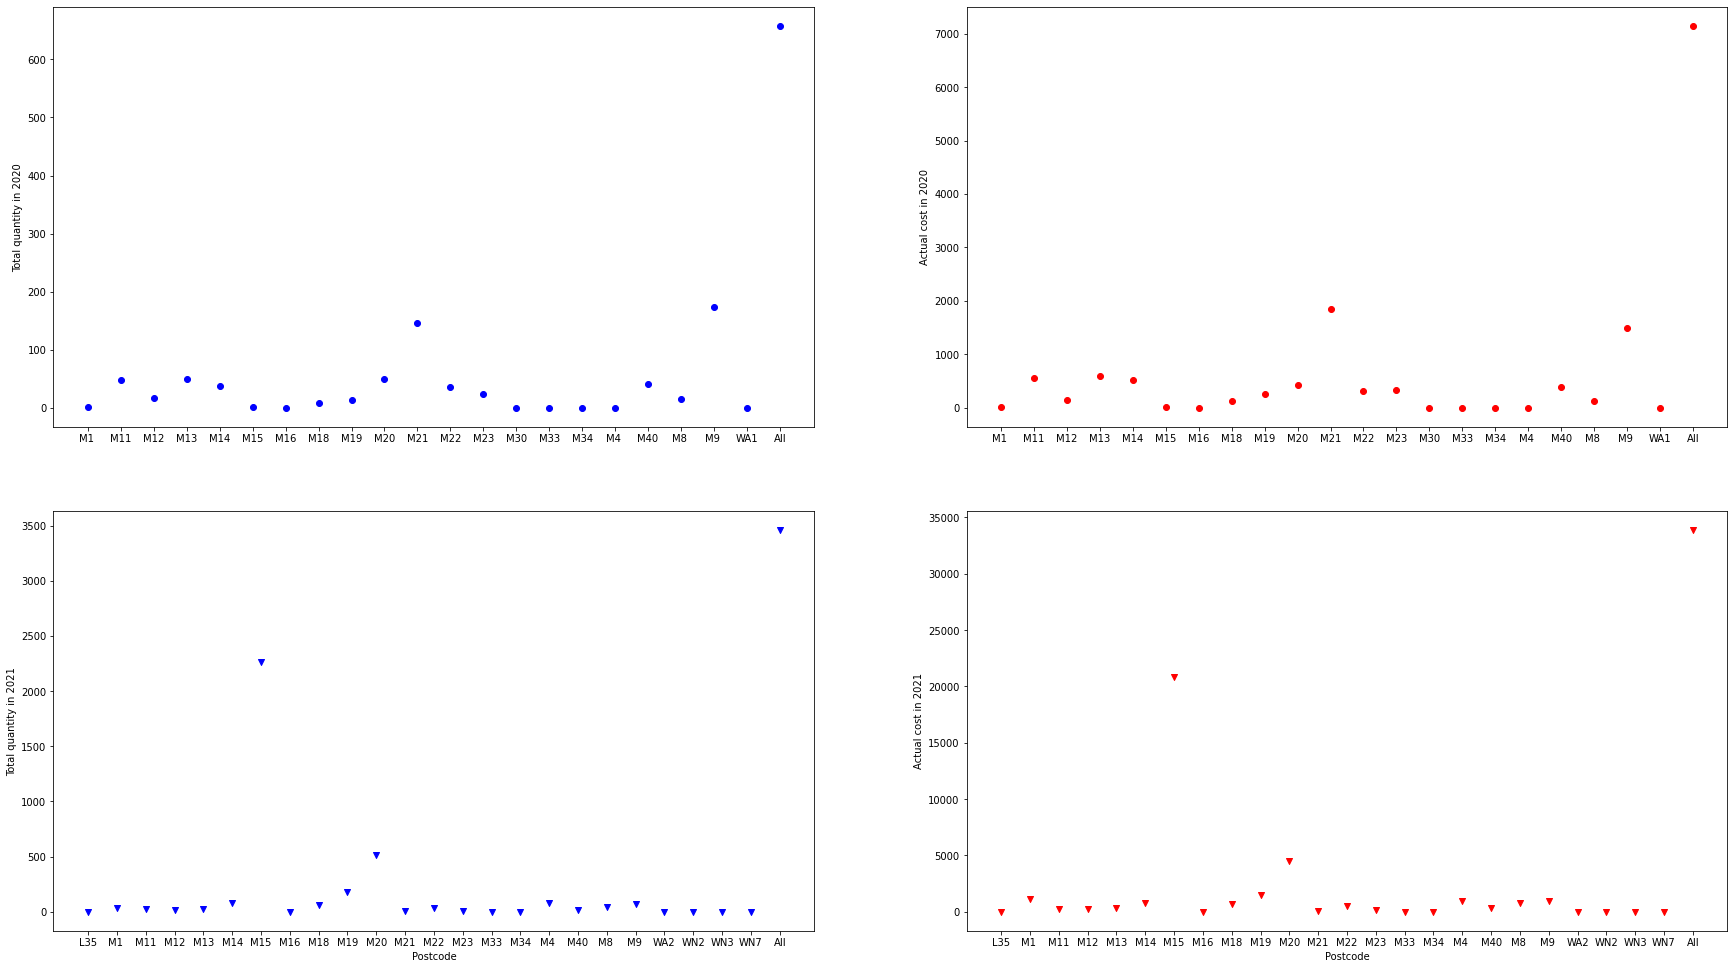

In [ ]:
#Plotting the total quantity and actual cost of the category "Immunological products and vaccines" per postcode in Greater Manchester in 2020 and 2021
import matplotlib.pyplot as plt


fig, ax = plt.subplots(2, 2, sharey = False)
ax[0,0].figure.set_figwidth(30)
ax[0,0].figure.set_figheight(17)
ax[0,0].scatter(TQ4_per_med_2020['area_co'], TQ4_per_med_2020['14: Immunological Products and Vaccines'], color = 'b', marker = 'o')
ax[1,0].scatter(TQ4_per_med_2021['area_co'], TQ4_per_med_2021['14: Immunological Products and Vaccines'], color = 'b', marker = 'v')
ax[0,1].scatter(AC1_per_med_2020['area_co'], AC1_per_med_2020['14: Immunological Products and Vaccines'], color = 'r', marker = 'o')
ax[1,1].scatter(AC1_per_med_2021['area_co'], AC1_per_med_2021['14: Immunological Products and Vaccines'], color = 'r', marker = 'v')
ax[0,0].set_ylabel("Total quantity in 2020")
ax[1,0].set_ylabel("Total quantity in 2021")
ax[0,1].set_ylabel("Actual cost in 2020")
ax[1,1].set_ylabel("Actual cost in 2021")
ax[1,0].set_xlabel("Postcode")
ax[1,1].set_xlabel("Postcode")
#ax[0].title("Total quantity of Immunological Products and Vaccines in April 2021 according to the postcode")
plt.show()

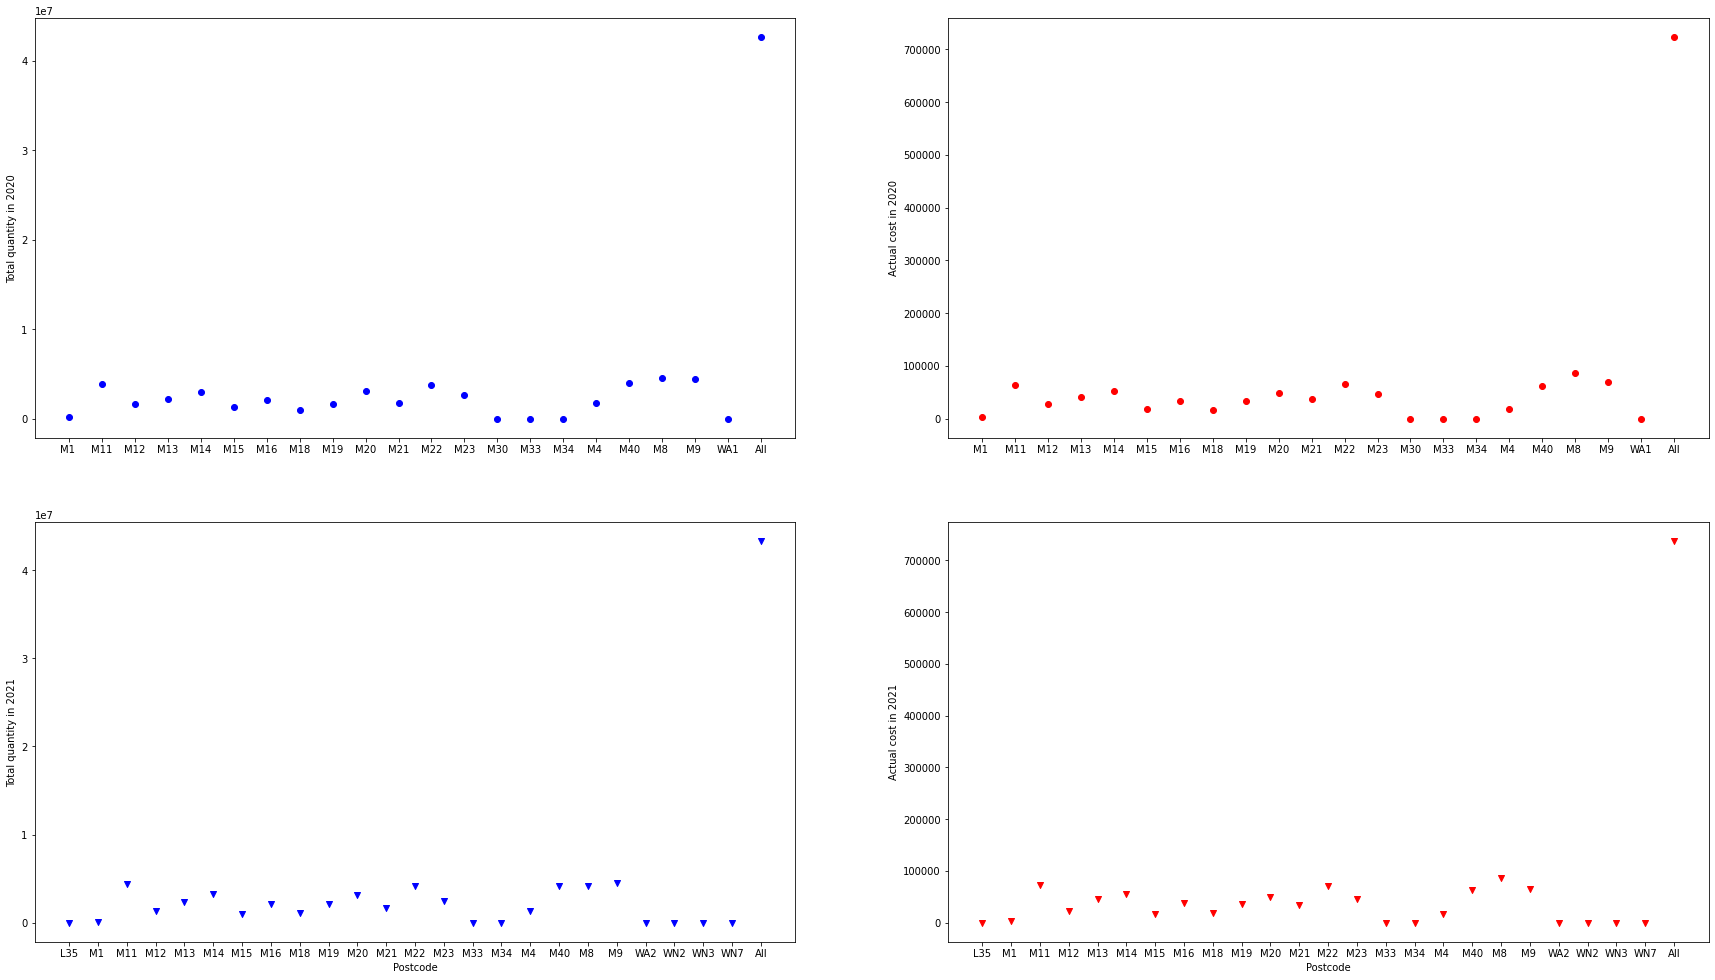

In [ ]:
#Plots for Nutrition and blood

fig, ax = plt.subplots(2, 2, sharey = False)
ax[0,0].figure.set_figwidth(30)
ax[0,0].figure.set_figheight(17)
ax[0,0].scatter(TQ4_per_med_2020['area_co'], TQ4_per_med_2020['09: Nutrition and Blood'], color = 'b', marker = 'o')
ax[1,0].scatter(TQ4_per_med_2021['area_co'], TQ4_per_med_2021['09: Nutrition and Blood'], color = 'b', marker = 'v')
ax[0,1].scatter(AC1_per_med_2020['area_co'], AC1_per_med_2020['09: Nutrition and Blood'], color = 'r', marker = 'o')
ax[1,1].scatter(AC1_per_med_2021['area_co'], AC1_per_med_2021['09: Nutrition and Blood'], color = 'r', marker = 'v')
ax[0,0].set_ylabel("Total quantity in 2020")
ax[1,0].set_ylabel("Total quantity in 2021")
ax[0,1].set_ylabel("Actual cost in 2020")
ax[1,1].set_ylabel("Actual cost in 2021")
ax[1,0].set_xlabel("Postcode")
ax[1,1].set_xlabel("Postcode")
#ax[0].title("Total quantity of Immunological Products and Vaccines in April 2021 according to the postcode")
plt.show()

# **Mingyi's Code** ⬇

In [ ]:
#calculate NIC's cost in each area in the Greater Manchester
NIC_ac_2020 = pd.crosstab(index=df_2020['CHEMICAL_SUBSTANCE_BNF_DESCR'], columns=df_2020['area_co'], values=df_2020['NIC'], aggfunc='sum', margins=True).fillna(0).astype(int)
NIC_ac_2021 = pd.crosstab(index=df_2021['CHEMICAL_SUBSTANCE_BNF_DESCR'], columns=df_2021['area_co'], values=df_2021['NIC'], aggfunc='sum', margins=True).fillna(0).astype(int)

NIC_ac_2020.to_csv("TQ_2020.csv")
NIC_ac_2021.to_csv("TQ_2021.csv")

#Delete the "All" row in the table
NIC_ac_2020 = NIC_ac_2020.drop(["All"], axis=0)
NIC_ac_2021 = NIC_ac_2021.drop(["All"], axis=0)

#Rename the All column to NIC_2020 and NIC_2021
NIC_ac_2020 = NIC_ac_2020.rename(columns={"All": "NIC_2020"})
NIC_ac_2021 = NIC_ac_2021.rename(columns={"All": "NIC_2021"})

#filter the tables to include only medicine's name and NIC
df5 = NIC_ac_2020.filter(['CHEMICAL_SUBSTANCE_BNF_DESCR', 'NIC_2020'])
df6 = NIC_ac_2021.filter(['CHEMICAL_SUBSTANCE_BNF_DESCR', 'NIC_2021'])

#find the difference between NIC in 2020 and 2021
NIC_ac_allyear = pd.merge(df5, df6, how="outer", on=('CHEMICAL_SUBSTANCE_BNF_DESCR')).fillna(0).astype(int)
diff_NIC = (df6['NIC_2021'] - df5['NIC_2020'])
NIC_ac_allyear['diff_NIC'] = diff_NIC.fillna(0)

#find the percentage of the difference
diff_NIC_pct = (diff_NIC / df5['NIC_2020']) * 100
NIC_ac_allyear['diff_NIC_pct'] = diff_NIC_pct.fillna(0)

#Filter zero differance in NIC
NIC_ac_allyear = NIC_ac_allyear.query("diff_NIC>0")

#plot the NIC of 2021 and 2020
fig_NIC_ac = px.line(NIC_ac_allyear, x=NIC_ac_allyear.index, y='diff_NIC',
                    labels={
                       "x": "Medicines",
                       "diff_NIC": "NIC difference"},
                   title='NIC difference between 2021 & 2020')
fig_NIC_ac.show()

#plot the percentage of NIC difference between the medicine of 2021 and 2020
fig_NIC_pct = px.line(NIC_ac_allyear, x=NIC_ac_allyear.index, y='diff_NIC_pct',
                  labels={
                     "x": "Medicines",
                     "diff_NIC_pct": "NIC Increase %"},
                 title='Percentage increase of NIC difference between 2021 & 2020')
fig_NIC_pct.update_traces(line_color='#F54730')
fig_NIC_pct.show()

# **Mizue's Code** ⬇

## Backgroud infomation in the three forcused Primary Care Organisations(PCO)

### 1) The number and top of Area code

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#Background information 1)Check the number and top of Area code in 2020
df_2020['area_co'] = df_2020['POSTCODE'].str[0:3]
df_2020['area_co'].describe()

count     215625
unique        21
top          M9 
freq       20797
Name: area_co, dtype: object

In [7]:
# Background information 1) Check the number and top of Area code in 2021
df_2021['area_co'] = df_2021['POSTCODE'].str[0:3]
df_2021['area_co'].describe()

count     221099
unique        24
top          M22
freq       21131
Name: area_co, dtype: object

### 2) Practices

In [8]:
#Background information 2)-1  Practices in 2020
df_2020['PRACTICE_NAME'].describe()

count                        216319
unique                          114
top       BENCHILL MEDICAL PRACTICE
freq                           3981
Name: PRACTICE_NAME, dtype: object

In [9]:
#Background information 2)-2 practices in 2021
df_2021['PRACTICE_NAME'].describe()

count                        221428
unique                          116
top       BENCHILL MEDICAL PRACTICE
freq                           4231
Name: PRACTICE_NAME, dtype: object

### 3) CHEMICAL_SUBSTANCE_BNF_DESCR

In [10]:
#Background information 3)-1 CHEMICAL_SUBSTANCE_BNF_DESCR in 2020
df_2020['CHEMICAL_SUBSTANCE_BNF_DESCR'].describe()

count             216319
unique              1042
top       Colecalciferol
freq                3598
Name: CHEMICAL_SUBSTANCE_BNF_DESCR, dtype: object

In [11]:
#Background information 3)-2 CHEMICAL_SUBSTANCE_BNF_DESCR in 2021
df_2021['CHEMICAL_SUBSTANCE_BNF_DESCR'].describe()

count             221428
unique              1031
top       Colecalciferol
freq                3970
Name: CHEMICAL_SUBSTANCE_BNF_DESCR, dtype: object

### 4) BNF_DESCRIPTION

In [12]:
#Background information 4)-1 BNF_DESCRIPTION in 2020
df_2020['BNF_DESCRIPTION'].describe()

count                        216319
unique                         7625
top       Paracetamol 500mg tablets
freq                           1105
Name: BNF_DESCRIPTION, dtype: object

In [13]:
#Background information 4)-2 BNF_DESCRIPTION in 2021
df_2021['BNF_DESCRIPTION'].describe()

count                        221428
unique                         7576
top       Paracetamol 500mg tablets
freq                           1063
Name: BNF_DESCRIPTION, dtype: object

### 5) ACTUAL_COST

In [14]:
#Background information 5)-1 ACTUAL_COST in 2020, 2021
frames = [df_2020, df_2021]
df_marge = pd.concat(frames) # marge into a dataframe of 2020 and 2021

table = pd.pivot_table(df_marge, 
                       values =['ACTUAL_COST'], index = ['YEAR_MONTH'], 
                       aggfunc=np.sum)
table

,ACTUAL_COST
YEAR_MONTH,
202004,7.849553e+06
202104,8.129385e+06


In [15]:
#(1)): Percentage increment of ACTUAL_COST in total from 2020 to 2021

table1 = pd.pivot_table(df_2020, 
                       values = 'ACTUAL_COST', index = ['STP_NAME'], 
                       aggfunc=np.sum) #ACTUAL_COST in total(2020)

table2 = pd.pivot_table(df_2021, 
                       values = 'ACTUAL_COST', index = ['STP_NAME'], 
                       aggfunc=np.sum) #ACTUAL_COST in total(2021)

table3 =((table2['ACTUAL_COST']- table1['ACTUAL_COST'])/ table1['ACTUAL_COST'])*100
table3 

STP_NAME
GREATER MANCHESTER HSC PARTNERSHIP STP    3.564933
Name: ACTUAL_COST, dtype: float64

In [16]:
# Background information 5)-2(2):Increment(ratio) of 'ACTUAL_COST' from 2020 to 2021
df_2020['ACTUAL_COST'].sum()
df_2021['ACTUAL_COST'].sum()

df_2021['ACTUAL_COST'].sum()/df_2020['ACTUAL_COST'].sum()

1.035649332444932

In [17]:
#  Background information 6) pivot table of 'ACTUAL_COST' of drugs(CHEMICAL_SUBSTANCE_BNF_DESCR') purchased in each area code in 2021
pd.pivot_table(df_2020,index=['area_co','CHEMICAL_SUBSTANCE_BNF_DESCR'], values=['ACTUAL_COST']).sum(1)

area_co  CHEMICAL_SUBSTANCE_BNF_DESCR
M1       Acenocoumarol                   25.792800
         Aciclovir                       13.129020
         Aclidinium bromide              60.447600
         Acrivastine                     41.670050
         Adapalene                       38.211493
                                           ...    
M9       Zopiclone                        4.105761
         Zuclopenthixol hydrochloride    10.005403
WA1      Colecalciferol                   5.271580
         Dexamethasone                   14.725420
         Other Appliances                 0.821140
Length: 11876, dtype: float64

## Top 30 of prescribed drugs 

In [18]:
# prescribed_drug(by the name of main active ingredient) Top 30 in 2020
drug_count_2020 = df_2020['CHEMICAL_SUBSTANCE_BNF_DESCR'] .value_counts()
drug_count_2020.head(30)

Colecalciferol                                3598
Co-codamol (Codeine phosphate/paracetamol)    3383
Other Appliances                              3213
Emollients                                    3000
Enteral nutrition                             2957
Metformin hydrochloride                       2488
Wound Management & Other Dressings            2333
Paracetamol                                   2245
Pregabalin                                    2233
Gabapentin                                    2025
Quetiapine                                    2016
Eye Products                                  1979
Other emollient preparations                  1970
Hydrocortisone                                1936
Beclometasone dipropionate                    1884
Ramipril                                      1879
Glucose blood testing reagents                1871
Venlafaxine                                   1864
Morphine sulfate                              1809
Macrogol 3350                  

In [19]:
# prescribed_drug(by the name of main active ingredient) Top 30 in 2021
drug_count_2021 = df_2021['CHEMICAL_SUBSTANCE_BNF_DESCR'] .value_counts()
drug_count_2021.head(30)

Colecalciferol                                3970
Co-codamol (Codeine phosphate/paracetamol)    3568
Other Appliances                              3493
Emollients                                    3265
Enteral nutrition                             3018
Metformin hydrochloride                       2616
Pregabalin                                    2472
Wound Management & Other Dressings            2296
Quetiapine                                    2212
Eye Products                                  2171
Gabapentin                                    2132
Paracetamol                                   2096
Hydrocortisone                                2062
Other emollient preparations                  2015
Venlafaxine                                   1978
Glucose blood testing reagents                1936
Ramipril                                      1867
Macrogol 3350                                 1840
Levothyroxine sodium                          1781
Morphine sulfate               

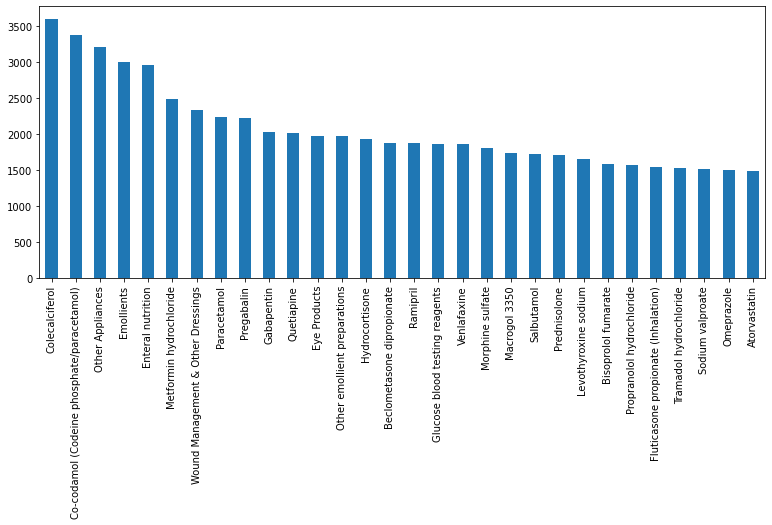

In [20]:
# Individual bar chart of prescribed_drug Top 30 in 2020
drug_2020_top30 = drug_count_2020.head(30)
drug_2020_top30.plot.bar(figsize=(13,5))

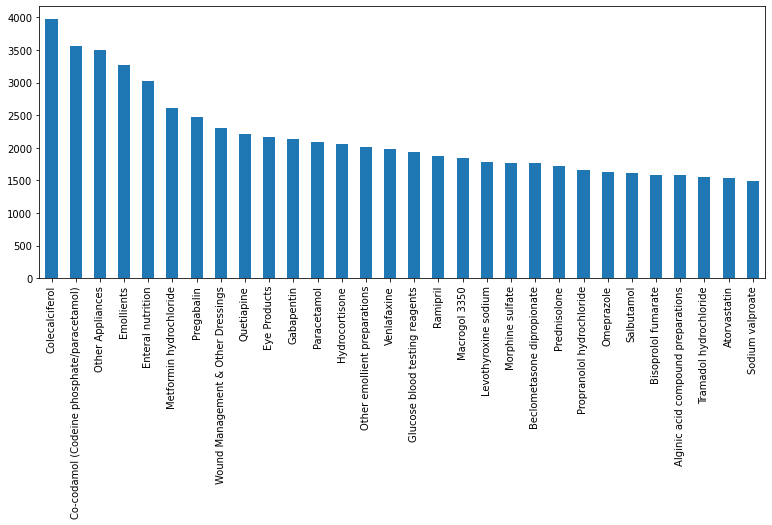

In [21]:
# Individual bar chart of prescribed_drug Top 30 in 2021
drug_2021_top30 = drug_count_2021.head(30)
drug_2021_top30.plot.bar(figsize=(13,5))

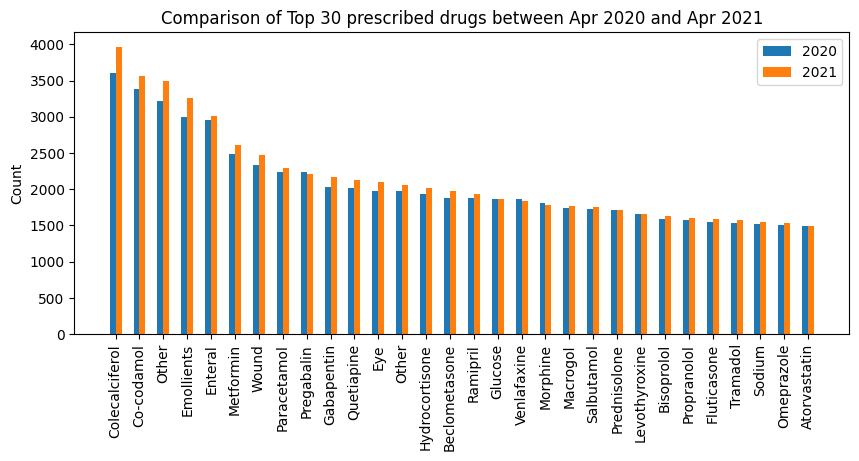

In [22]:
# Comparison bar chart of Top 30 prescribed drugs between Apr 2020 and Apr 2021
x = np.arange(len(drug_2020_top30.keys()))
width = 0.25

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, drug_2020_top30, width, label='2020')
rects2 = ax.bar(x + width/2, drug_2021_top30, width, label='2021')

ax.set_ylabel('Count')
ax.set_title('Comparison of Top 30 prescribed drugs between Apr 2020 and Apr 2021')
ax.set_xticks(x)

first_word = pd.Series(drug_2020_top30.keys().tolist())
first = first_word.str.split(' ').str[0]

ax.set_xticklabels(first, rotation=90)

ax.legend()

fig = plt.gcf()
fig.set_size_inches(10,4, forward =True)
fig.set_dpi(100)

## The drugs grouped by 'BNF_CHAPTER_PLUS_CODE'

In [23]:
#summarise the group of 'BNF_CHAPTER_PLUS_CODE' in 2020
df_2020['BNF_CHAPTER_PLUS_CODE'].describe()

count                         216319
unique                            20
top       04: Central Nervous System
freq                           54743
Name: BNF_CHAPTER_PLUS_CODE, dtype: object

In [24]:
#summarise the group of 'BNF_CHAPTER_PLUS_CODE' in 2021
df_2021['BNF_CHAPTER_PLUS_CODE'].describe()

count                         221428
unique                            21
top       04: Central Nervous System
freq                           56409
Name: BNF_CHAPTER_PLUS_CODE, dtype: object

In [25]:
# Not needed ??) count prescribed drugs by group( 'BNF_CHAPTER_PLUS_CODE' ) in 2020
drug_count_byGroup_2020 = df_2020[['BNF_CHAPTER_PLUS_CODE', 'QUANTITY']] .value_counts()
drug_count_byGroup_2020.describe()

count     2019.000000
mean       107.141654
std        510.512746
min          1.000000
25%          1.000000
50%          5.000000
75%         35.000000
max      10582.000000
dtype: float64

In [26]:
# sum(k GBP) of 'ACTUAL_COST' grouped by 'BNF_CHAPTER_PLUS_CODE'  [2020]; k=1000
df_2020.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/1000

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                                468.508071
02: Cardiovascular System                                   914.784524
03: Respiratory System                                      968.189143
04: Central Nervous System                                 1519.091111
05: Infections                                              181.082084
06: Endocrine System                                       1313.136027
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     194.625380
08: Malignant Disease and Immunosuppression                  94.722777
09: Nutrition and Blood                                     724.794658
10: Musculoskeletal and Joint Diseases                      137.940178
11: Eye                                                     116.891564
12: Ear, Nose and Oropharynx                                 80.768769
13: Skin                                                    305.498601
14: Immunological Products and Vaccines                

In [27]:
# sum(k GBP) of 'ACTUAL_COST' grouped by 'BNF_CHAPTER_PLUS_CODE'  [2021]
df_2021.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/1000

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                                544.279861
02: Cardiovascular System                                  1016.091803
03: Respiratory System                                      934.475671
04: Central Nervous System                                 1463.184325
05: Infections                                              173.144707
06: Endocrine System                                       1385.890353
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     199.773825
08: Malignant Disease and Immunosuppression                 100.457815
09: Nutrition and Blood                                     740.701600
10: Musculoskeletal and Joint Diseases                      144.268225
11: Eye                                                     112.416135
12: Ear, Nose and Oropharynx                                 80.327344
13: Skin                                                    335.465074
14: Immunological Products and Vaccines                

Text(0, 0.5, 'Percentage increase(%)')

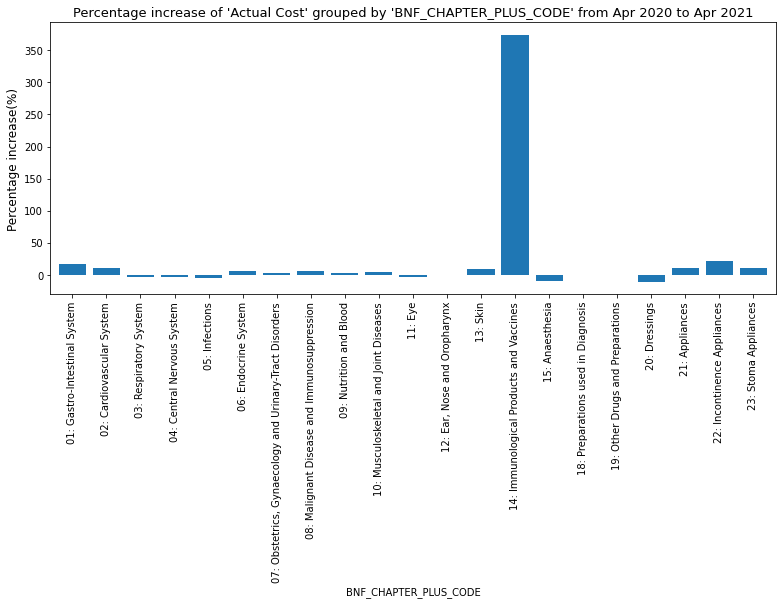

In [28]:
# Calculating percentage increase of 'ACTUAL_COST' grouped by 'BNF_CHAPTER_PLUS_CODE' from Apr 2020 to Apr 2021
AC_sum_2021 =df_2021.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()
AC_sum_2020 =df_2020.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()

percentage_increase =  (AC_sum_2021 - AC_sum_2020)/AC_sum_2020*100

ax=percentage_increase.plot.bar(figsize=(13,5), width=.8)
ax.set_title("Percentage increase of 'Actual Cost' grouped by 'BNF_CHAPTER_PLUS_CODE' from Apr 2020 to Apr 2021", fontsize = 13)
ax.set_xlabel('BNF_CHAPTER_PLUS_CODE', fontsize = 10)
ax.set_ylabel('Percentage increase(%)', fontsize = 12)

Text(0, 0.5, 'Percentage increase(%)')

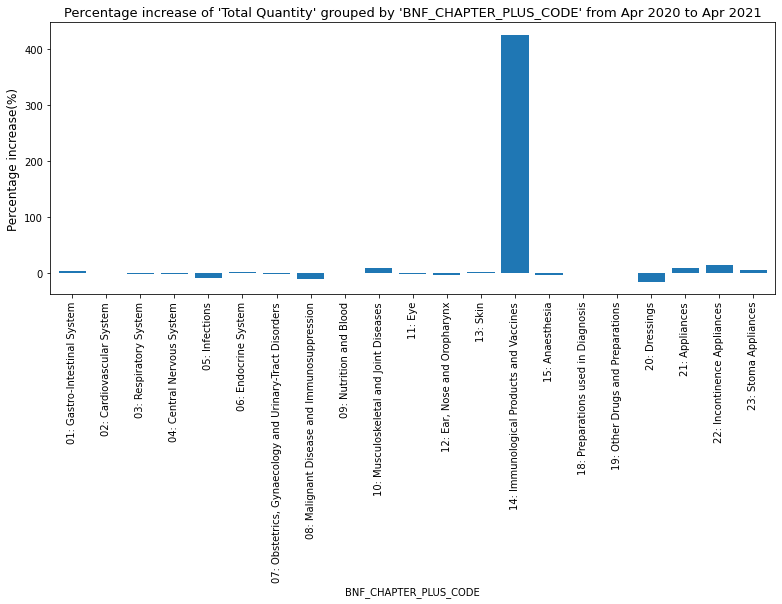

In [29]:
# Calculating percentage increase of 'TOTAL_QUANTITY' grouped by 'BNF_CHAPTER_PLUS_CODE' from Apr 2020 to Apr 2021
TQ_sum_2021 =df_2021.groupby('BNF_CHAPTER_PLUS_CODE')['TOTAL_QUANTITY'].sum()
TQ_sum_2020 =df_2020.groupby('BNF_CHAPTER_PLUS_CODE')['TOTAL_QUANTITY'].sum()

percentage_increase =  (TQ_sum_2021 - TQ_sum_2020)/TQ_sum_2020*100
percentage_increase.plot.bar(figsize=(13,5))

ax=percentage_increase.plot.bar(figsize=(13,5), width=.8)
ax.set_title("Percentage increase of 'Total Quantity' grouped by 'BNF_CHAPTER_PLUS_CODE' from Apr 2020 to Apr 2021", fontsize = 13)
ax.set_xlabel('BNF_CHAPTER_PLUS_CODE', fontsize = 10)
ax.set_ylabel('Percentage increase(%)', fontsize = 12)

In [30]:
#proprtion(%) of ACT(kGBP) of the drugs in each group in 2020
prop_AC_sum_2020 = df_2020.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/df_2020['ACTUAL_COST'].sum()*100
prop_AC_sum_2020 

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                                5.968595
02: Cardiovascular System                                  11.653969
03: Respiratory System                                     12.334322
04: Central Nervous System                                 19.352581
05: Infections                                              2.306909
06: Endocrine System                                       16.728800
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     2.479445
08: Malignant Disease and Immunosuppression                 1.206728
09: Nutrition and Blood                                     9.233579
10: Musculoskeletal and Joint Diseases                      1.757300
11: Eye                                                     1.489149
12: Ear, Nose and Oropharynx                                1.028960
13: Skin                                                    3.891923
14: Immunological Products and Vaccines                     0.091072
15: Anaesthe

In [31]:
#proprtion(%) of ACT(kGBP) of the drugs in each group in 2021
#df_2021_sorted = df_2021.sort_values(by =['ACTUAL_COST'], ascending=False) 
#df_2021_sorted.head() 

prop_AC_sum_2021 = df_2021.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/df_2021['ACTUAL_COST'].sum()*100
prop_AC_sum_2021

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                                6.695216
02: Cardiovascular System                                  12.499000
03: Respiratory System                                     11.495036
04: Central Nervous System                                 17.998710
05: Infections                                              2.129862
06: Endocrine System                                       17.047912
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     2.457429
08: Malignant Disease and Immunosuppression                 1.235737
09: Nutrition and Blood                                     9.111411
10: Musculoskeletal and Joint Diseases                      1.774651
11: Eye                                                     1.382837
12: Ear, Nose and Oropharynx                                0.988111
13: Skin                                                    4.126574
14: Immunological Products and Vaccines                     0.416944
15: Anaesthe

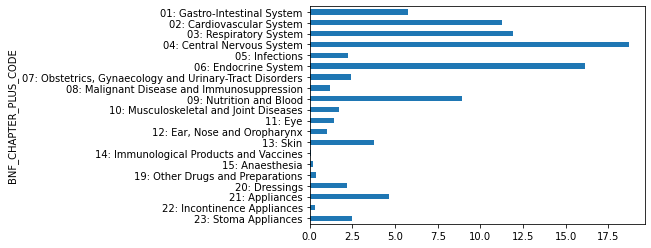

In [32]:
#Bar-chart of the proprtion(%) of ACT(kGBP) of the drugs in each group in 2020

prop_AC_sum_2020 = df_2020.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/df_2021['ACTUAL_COST'].sum()*100
df2020 = prop_AC_sum_2020.iloc[::-1]
prop_AC_sum_2020_barh = df2020.plot.barh(stacked=True);

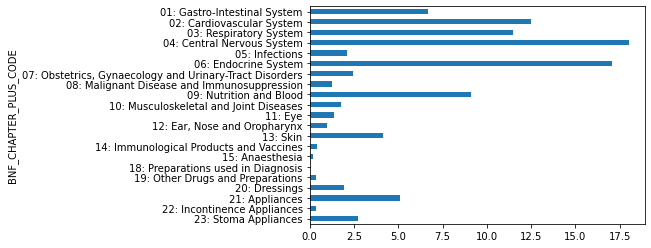

In [33]:
#Bar-chart of the proprtion(%) of ACT(kGBP) of the drugs in each group in 2021

prop_AC_sum_2021 = df_2021.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/df_2021['ACTUAL_COST'].sum()*100
df2021 = prop_AC_sum_2021.iloc[::-1]
prop_AC_sum_2021_barh = df2021.plot.barh(stacked=True);

## Close-up the TOTALQUANTITY and ACTUALCOST in 14: Immunological Products and Vaccines

In [34]:
#[2020] list of the drugs('CHEMICAL_SUBSTANCE_BNF_DESCR'),'TOTAL_QUANTITY' and 'ACTUAL_COST' in "BNF_CHAPTER_PLUS_CODE:14" in 2020
drugs_14_2020 = df_2020.loc[df_2020['BNF_CHAPTER_PLUS_CODE'] == '14: Immunological Products and Vaccines']
drugs_14_AC_2020 = drugs_14_2020[['CHEMICAL_SUBSTANCE_BNF_DESCR','TOTAL_QUANTITY', 'ACTUAL_COST']]

drugs_14_AC_2020_sum = drugs_14_AC_2020.groupby(['CHEMICAL_SUBSTANCE_BNF_DESCR']).sum()
drugs_14_AC_2020_sum

,TOTAL_QUANTITY,ACTUAL_COST
CHEMICAL_SUBSTANCE_BNF_DESCR,,
Diphtheria,34.0,260.43781
Hepatitis A,67.0,1258.05847
Hepatitis A/hepatitis B,2.0,38.65200
Hepatitis A/typhoid vaccine,25.0,831.04589
Hepatitis B,57.0,684.06972
Influenza,210.0,1698.85673
"Measles, mumps and rubella vaccine",1.0,7.12680
Meningococcal A + C + W135 + Y vaccine,1.0,27.88745
Pneumococcal,195.0,1657.93970


In [35]:
#  [2021]list of the drugs('CHEMICAL_SUBSTANCE_BNF_DESCR'),'TOTAL_QUANTITY' and 'ACTUAL_COST' in "BNF_CHAPTER_PLUS_CODE:14" in 2020
drugs_14_2021 = df_2021.loc[df_2021['BNF_CHAPTER_PLUS_CODE'] == '14: Immunological Products and Vaccines']
drugs_14_AC_2021 = drugs_14_2021[['CHEMICAL_SUBSTANCE_BNF_DESCR','TOTAL_QUANTITY', 'ACTUAL_COST']]

drugs_14_AC_2021_sum = drugs_14_AC_2021.groupby(['CHEMICAL_SUBSTANCE_BNF_DESCR']).sum()
drugs_14_AC_2021_sum

,TOTAL_QUANTITY,ACTUAL_COST
CHEMICAL_SUBSTANCE_BNF_DESCR,,
Diphtheria,15.0,108.98827
Hepatitis A,16.0,312.55575
Hepatitis A/hepatitis B,7.0,217.19723
Hepatitis A/typhoid vaccine,2.0,66.61497
Hepatitis B,121.0,1397.28130
"Human papillomavirus (Type 6,11,16,18)",11.0,886.24367
Influenza,3090.0,27897.14378
Meningococcal A + C + W135 + Y vaccine,4.0,111.77009
Pneumococcal,181.0,2405.75182
